# Model Building And Evaluation for House Price Prediction

In [1]:
# Importing Required Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from catboost import Pool
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap
pd.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read files
X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

In [3]:
X_train.head()

,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,YrSold,MSSubClass_SC160,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC70,MSZoning_RL,MSZoning_RM,LandContour_HLS,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_1.5Unf,HouseStyle_2Story,RoofStyle_Gable,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_Grav,GarageType_Attchd,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,MoSold_May,MoSold_Nov,MoSold_Oct,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,0.247419,0,4,3,2,-0.024418,-0.707170,1,1,1,2,0,-1.420419,-0.345185,0.826356,0.370267,2,2,1.301065,-0.881012,-0.13634,0.467737,-0.828313,-0.249014,0.767840,-0.763471,0.135175,-0.204665,1,0.380118,3,0.740772,2,0.233642,0.296063,0.260836,1,2,0.819825,-1.100078,-0.39166,-0.129736,-0.301979,-0.070097,2,-0.200568,0.140293,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,-1.723115,0,4,2,2,1.099275,0.973857,1,1,2,2,2,0.689403,-0.345185,-3.115030,-0.386728,2,2,-0.114095,-0.881012,-0.13634,-0.910266,1.154905,-0.249014,-1.069941,-0.763471,-1.098297,-0.204665,1,-0.963302,3,-1.004860,0,0.244008,0.296063,0.236594,1,2,-0.937295,0.456197,-0.39166,-0.129736,-0.301979,-0.070097,0,-0.200568,-1.368961,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
2,-0.103809,0,4,3,2,1.226446,1.164103,1,1,2,2,1,-0.343515,-0.345185,0.509454,-0.104855,2,2,-1.177818,1.138725,-0.13634,0.211759,-0.828313,-0.249014,0.767840,1.284879,0.135175,-0.204665,2,0.380118,3,-1.004860,0,0.245181,0.296063,0.668109,1,2,1.026574,0.669419,-0.39166,-0.129736,-0.301979,-0.070097,0,-0.200568,1.649546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,0.465688,0,3,3,2,1.131091,1.021454,2,1,2,2,0,-1.420419,-0.345185,1.034471,0.700748,2,2,1.692265,-0.881012,-0.13634,0.848665,-0.828313,-0.249014,0.767840,-0.763471,0.135175,-0.204665,2,0.930142,3,0.740772,2,0.244301,1.665189,1.511745,1,2,-0.937295,1.329798,-0.39166,-0.129736,-0.301979,-0.070097,0,-0.200568,-0.614334,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0
4,0.295441,0,2,3,2,0.812209,0.544411,2,1,2,2,1,0.572161,2.919419,-0.773106,-0.056655,2,2,-0.929013,1.157824,-0.13634,0.429297,1.154905,-0.249014,0.767840,1.284879,0.135175,-0.204665,2,-0.243448,3,0.740772,1,0.241360,0.296063,0.357806,1,2,1.000995,0.807374,-0.39166,-0.129736,-0.301979,-0.070097,0,-0.200568,0.894920,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [4]:
X_test.head()

,LotArea,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,YrSold,MSSubClass_SC160,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC70,MSZoning_RL,MSZoning_RM,LandContour_HLS,LotConfig_CulDSac,LotConfig_FR2,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,HouseStyle_1.5Unf,HouseStyle_2Story,RoofStyle_Gable,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_Grav,GarageType_Attchd,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,MoSold_May,MoSold_Nov,MoSold_Oct,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,-0.154021,0,4,2,3,-0.251549,0.878591,1,1,1,2,0,0.753640,-0.345185,0.172555,0.188859,1,2,-0.125837,-0.881012,-0.13634,-0.921700,-0.828313,3.951564,-1.069941,-0.763471,0.135175,-0.204665,1,-0.243448,3,-1.004860,0,0.231547,-1.073062,-1.028861,1,2,1.075096,-1.100078,-0.391660,-0.129736,-0.301979,-0.070097,2,-0.200568,-1.368961,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,0.558504,0,3,3,2,0.748241,0.496575,2,1,2,2,1,0.901495,-0.345185,0.218974,0.470571,2,2,0.941250,1.247630,-0.13634,1.826212,1.154905,-0.249014,0.767840,1.284879,0.135175,-0.204665,2,1.422156,3,1.761900,1,0.240770,0.296063,1.143260,1,2,1.063020,0.515915,-0.391660,-0.129736,-0.301979,-0.070097,0,-0.200568,1.649546,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.034915,1,4,2,2,-1.432592,-1.681211,1,1,1,2,0,-1.420419,-0.345185,0.685026,0.145840,2,2,-0.245736,-0.881012,-0.13634,-1.038451,-0.828313,-0.249014,-1.069941,-0.763471,-1.098297,-0.204665,1,-0.963302,3,0.740772,2,0.220653,0.296063,-0.563406,1,2,-0.937295,-1.100078,2.486065,-0.129736,-0.301979,-0.070097,0,-0.200568,1.649546,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,-1.139932,0,4,2,3,-0.773762,-1.681211,1,2,1,2,0,0.584080,-0.345185,0.404921,0.142374,2,2,-0.319933,1.087005,-0.13634,0.434818,-0.828313,-0.249014,0.767840,-0.763471,0.135175,-0.204665,1,0.380118,3,1.761900,2,0.227636,0.296063,-0.272497,1,2,-0.937295,0.387601,1.739788,-0.129736,-0.301979,-0.070097,0,-0.200568,-1.368961,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
4,0.655229,0,3,3,2,1.162892,1.116577,2,1,2,2,2,0.898241,-0.345185,0.398538,0.559446,2,2,1.183057,-0.881012,-0.13634,0.352828,1.154905,-0.249014,0.767840,-0.763471,-1.098297,-0.204665,2,-0.243448,3,0.740772,2,0.244888,1.665189,2.112957,1,2,1.140497,-1.100078,-0.391660,-0.129736,-0.301979,-0.070097,0,-0.200568,0.894920,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [5]:
y_train.head()

,SalePrice
0,12.066816
1,11.884496
2,12.279328
3,12.676079
4,12.264346


In [6]:
y_test.head()

,SalePrice
0,11.947956
1,12.691584
2,11.652696
3,11.976666
4,12.661917


[<a href=#Model-Building-And-Evaluation-for-House-Price-Prediction>Back to top</a>]

# Models

In [7]:
base_models=['Linear Regression','Random Forest Regressor','Bagging Regressor','Gradient Boosting Regressor','Xgboost Regressor','SVR','AdaBoost Regressor','CatBoost Regressor','LGBM Regressor']
rmse_train=[]
adjr2_train=[]
rmse_test=[]
adjr2_test=[]

# Linear Regression

In [8]:
LR=LinearRegression()
LR.fit(X_train,y_train)
ytrain_pred=LR.predict(X_train)
ytest_pred=LR.predict(X_test)

# Evaluation

### Train Scores

In [9]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.010822165899111842
MAE of train data:  0.07509817054305261
RMSE of train data:  0.10402963952216619
R2Score of train data:  0.9301812153368945


In [10]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9228517541763737


### Test Scores

In [11]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.01782857340999196
MAE of test data:  0.08969651641194765
RMSE of test data:  0.13352368108313956
R2Score of test data:  0.8949059233818287


In [12]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8649232015231152


In [13]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

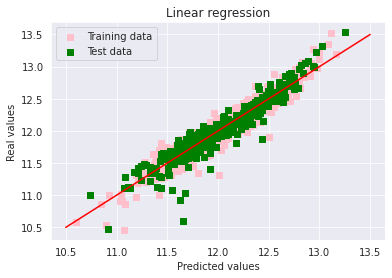

In [14]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Random Forest Regressor

In [15]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
ytrain_pred=rf.predict(X_train)
ytest_pred=rf.predict(X_test)

# Evaluation

### Train Scores

In [16]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.002949084491091308
MAE of train data:  0.03738230364865697
RMSE of train data:  0.05430547385937543
R2Score of train data:  0.9809740954854789


In [17]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9789767873275692


### Test Scores

In [18]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.019218364973365237
MAE of test data:  0.09352338849448219
RMSE of test data:  0.13863031765586212
R2Score of test data:  0.8867135202273183


In [19]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8543935539392298


In [20]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

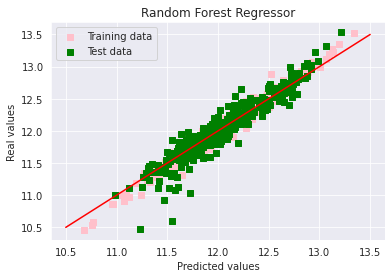

In [21]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Random Forest Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Bagging Regressor

In [22]:
br=BaggingRegressor(base_estimator=LR,n_estimators=100)
br.fit(X_train,y_train)
ytrain_pred=br.predict(X_train)
ytest_pred=br.predict(X_test)

# Evaluation

### Train Scores

In [23]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.010864338813502246
MAE of train data:  0.07501727369584625
RMSE of train data:  0.10423213906229808
R2Score of train data:  0.9299091384110841


In [24]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9225511150624641


### Test Scores

In [25]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.017901254833001284
MAE of test data:  0.08911136326907364
RMSE of test data:  0.13379557105151607
R2Score of test data:  0.8944774882590175


In [26]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8643725363799725


In [27]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

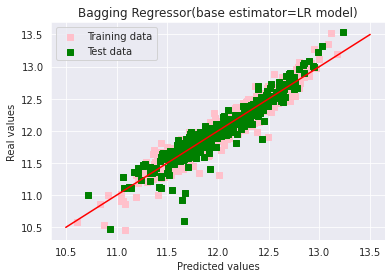

In [28]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Bagging Regressor(base estimator=LR model)")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Gradient Boosting Regressor

In [29]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
ytrain_pred=gbr.predict(X_train)
ytest_pred=gbr.predict(X_test)

# Evaluation

### Train Scores

In [30]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.006398932863228417
MAE of train data:  0.059112611015874596
RMSE of train data:  0.07999333011713175
R2Score of train data:  0.9587175321634942


In [31]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.954383766600571


### Test Scores

In [32]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.016862258351101125
MAE of test data:  0.08628294051085615
RMSE of test data:  0.12985475867715102
R2Score of test data:  0.9006020599431226


In [33]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8722444123386606


In [34]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

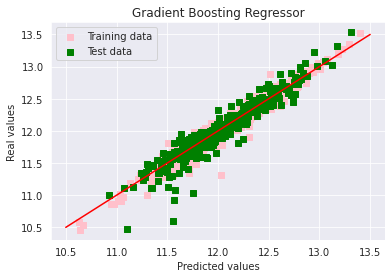

In [35]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Gradient Boosting Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Xgboost Regressor

In [36]:
xgr=XGBRegressor()
xgr.fit(X_train,y_train)
ytrain_pred=xgr.predict(X_train)
ytest_pred=xgr.predict(X_test)

[15:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Evaluation

### Train Scores

In [37]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.0077888928446083585
MAE of train data:  0.0646043206329382
RMSE of train data:  0.08825470437664136
R2Score of train data:  0.9497502591115938


In [38]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9444751239750404


### Test Scores

In [39]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.017837723308290955
MAE of test data:  0.08980591413952549
RMSE of test data:  0.1335579398923589
R2Score of test data:  0.8948519874840556


In [40]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8648538780309774


In [41]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

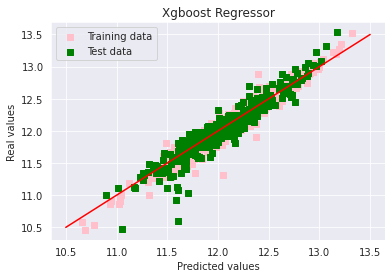

In [42]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Xgboost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# SVR

In [43]:
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)
ytrain_pred=svr.predict(X_train)
ytest_pred=svr.predict(X_test)

# Evaluation

### Train Scores

In [44]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.0114115768895734
MAE of train data:  0.0788306317561637
RMSE of train data:  0.10682498251613899
R2Score of train data:  0.9263786531321808


In [45]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9186500052467063


### Test Scores

In [46]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.018253303693888716
MAE of test data:  0.09166021921517302
RMSE of test data:  0.1351047878274072
R2Score of test data:  0.8924022661361578


In [47]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8617052655926499


In [48]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

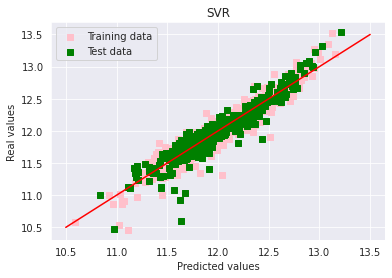

In [49]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("SVR")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# AdaBoost Regressor

In [50]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ytrain_pred=ada.predict(X_train)
ytest_pred=ada.predict(X_test)

# Evaluation

### Train Scores

In [51]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.022701644519945847
MAE of train data:  0.12242950260152838
RMSE of train data:  0.15067064916547565
R2Score of train data:  0.8535412185497407


In [52]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.8381662166009581


### Test Scores

In [53]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.03082155655857773
MAE of test data:  0.13407695800232147
RMSE of test data:  0.17556069195175134
R2Score of test data:  0.8183161965924268


In [54]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.7664828762085015


In [55]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

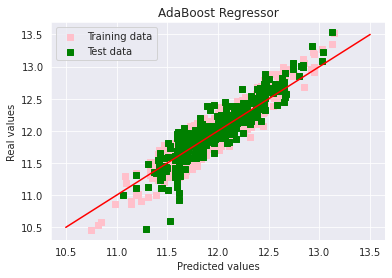

In [56]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("AdaBoost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# CatBoost Regressor

In [57]:
cbr=CatBoostRegressor()
cbr.fit(X_train,y_train)
ytrain_pred=cbr.predict(X_train)
ytest_pred=cbr.predict(X_test)

Learning rate set to 0.041084
0:	learn: 0.3842821	total: 75.2ms	remaining: 1m 15s
1:	learn: 0.3744001	total: 85.7ms	remaining: 42.8s
2:	learn: 0.3653887	total: 95.7ms	remaining: 31.8s
3:	learn: 0.3561571	total: 116ms	remaining: 28.8s
4:	learn: 0.3471771	total: 129ms	remaining: 25.6s
5:	learn: 0.3383923	total: 144ms	remaining: 23.9s
6:	learn: 0.3301327	total: 172ms	remaining: 24.5s
7:	learn: 0.3226787	total: 189ms	remaining: 23.5s
8:	learn: 0.3151469	total: 207ms	remaining: 22.8s
9:	learn: 0.3079737	total: 212ms	remaining: 20.9s
10:	learn: 0.3006675	total: 223ms	remaining: 20s
11:	learn: 0.2937870	total: 240ms	remaining: 19.8s
12:	learn: 0.2872530	total: 260ms	remaining: 19.7s
13:	learn: 0.2815633	total: 283ms	remaining: 20s
14:	learn: 0.2761448	total: 319ms	remaining: 20.9s
15:	learn: 0.2711866	total: 335ms	remaining: 20.6s
16:	learn: 0.2658731	total: 347ms	remaining: 20.1s
17:	learn: 0.2613686	total: 359ms	remaining: 19.6s
18:	learn: 0.2566430	total: 373ms	remaining: 19.3s
19:	learn: 

# Evaluation

### Train Scores

In [58]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.0011264805942050847
MAE of train data:  0.02595214893075364
RMSE of train data:  0.033563083800584904
R2Score of train data:  0.9927325540222566


In [59]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.991969629498619


### Test Scores

In [60]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.016232256274988633
MAE of test data:  0.08114571056452494
RMSE of test data:  0.12740587221548555
R2Score of test data:  0.9043157326489526


In [61]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8770175740223303


In [62]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

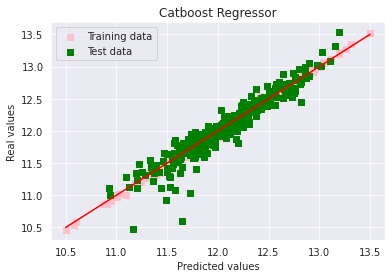

In [63]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Catboost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# LGBM Regressor

In [64]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
ytrain_pred=lgbm.predict(X_train)
ytest_pred=lgbm.predict(X_test)

# Evaluation

### Train Scores

In [65]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.0017454267698953781
MAE of train data:  0.02658614266287585
RMSE of train data:  0.04177830501462904
R2Score of train data:  0.9887394467125525


In [66]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9875573323522902


### Test Scores

In [67]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.017574585827063772
MAE of test data:  0.08905473117034605
RMSE of test data:  0.13256917374361119
R2Score of test data:  0.896403103772345


In [68]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8668475186721023


In [69]:
# Append Model Performace Scores to List
rmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
adjr2_train.append(adjusted_r2train)
rmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
adjr2_test.append(adjusted_r2test)

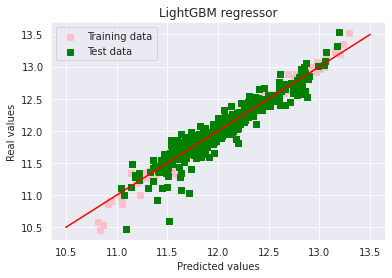

In [70]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("LightGBM regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Model Performance Table

In [71]:
performace = pd.DataFrame(base_models, columns = ['Regressors'])
#performace = pd.DataFrame({'Regressors':base_models})
performace['RMSE_TrainData'] = rmse_train
performace['adjr2score_TrainData'] = adjr2_train
performace['RMSE_TestData'] = rmse_test
performace['adjr2score_TestData'] = adjr2_test
#performace.set_index('Regressors',inplace=True)
performace

,Regressors,RMSE_TrainData,adjr2score_TrainData,RMSE_TestData,adjr2score_TestData
0,Linear Regression,0.104030,0.922852,0.133524,0.864923
1,Random Forest Regressor,0.054305,0.978977,0.138630,0.854394
2,Bagging Regressor,0.104232,0.922551,0.133796,0.864373
3,Gradient Boosting Regressor,0.079993,0.954384,0.129855,0.872244
4,Xgboost Regressor,0.088255,0.944475,0.133558,0.864854
5,SVR,0.106825,0.918650,0.135105,0.861705
6,AdaBoost Regressor,0.150671,0.838166,0.175561,0.766483
7,CatBoost Regressor,0.033563,0.991970,0.127406,0.877018
8,LGBM Regressor,0.041778,0.987557,0.132569,0.866848


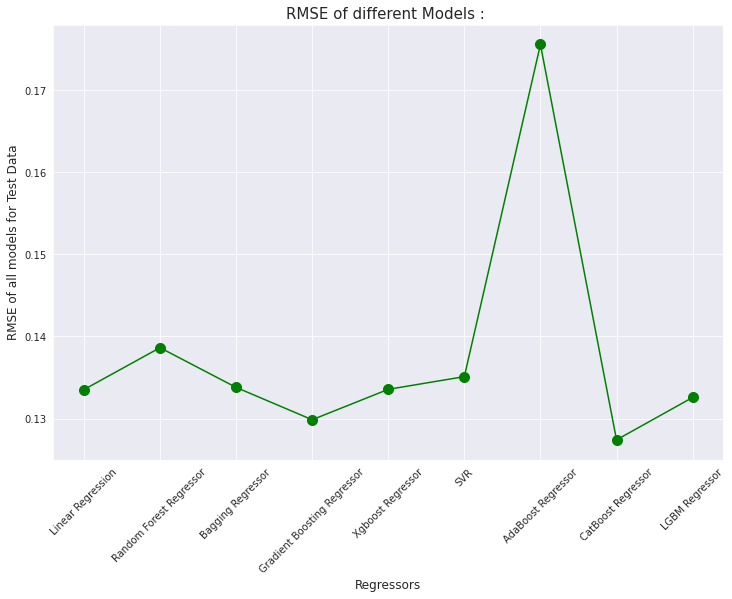

----------------------------------------------------------------------------------------------------


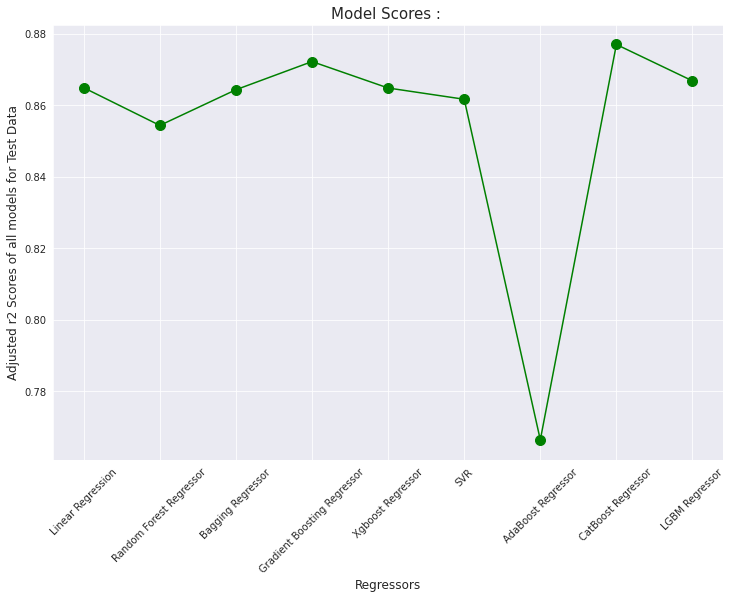

In [72]:
#Plot RMSE
plt.figure(figsize = (12,8))
#sns.lineplot(performace['Regressors'],performace['RMSE_TestData'])
plt.plot(performace['Regressors'],performace['RMSE_TestData'],"go-",markersize=10)
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('RMSE of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('RMSE of different Models : ',fontsize = 15)
plt.show()
print('-'*100)
#Plot AdjR2Score
plt.figure(figsize = (12,8))
#sns.lineplot(performace['Regressors'],performace['adjr2score_TestData'])
plt.plot(performace['Regressors'],performace['adjr2score_TestData'],"go-",markersize=10)
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('Adjusted r2 Scores of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Model Scores : ',fontsize = 15)
plt.show()

> - These rmse and adjusted r2 score values are for test data.
> - We can see that our best base line model is CatBoost Regressor.
> - Let us hyper tune some of our models and check results again.`

[<a href=#Model-Building-And-Evaluation-for-House-Price-Prediction>Back to top</a>]

# Hypertuned Models

In [73]:
tuned_models=['GBM','Xgboost','LightGBM','CatBoost']
hmrmse_train=[]
hmadjr2_train=[]
hmrmse_test=[]
hmadjr2_test=[]

# GBM

In [74]:
learning_rate=[0.005,0.01,0.05,0.1,0.15,0.2]    
n_estimators = [int(x) for x in np.linspace(start=200, stop=4000, num=6)] 
max_depth = [int(x) for x in np.linspace(2, 10, num=5)] 
min_samples_split = [2,3,4, 5, 10] 
min_samples_leaf = [1, 2, 3] 
subsample=[0.6,0.7,0.75,0.8,0.85,0.9]  
max_features = ['log2', 'sqrt']    
                                         
                  
params={
    'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,
    'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
     'subsample':subsample,'max_features':max_features
}

gbm1=GradientBoostingRegressor(random_state=42)
rcvgbm= RandomizedSearchCV(gbm1, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)

rcvgbm.fit(X_train, y_train)
rcvgbm.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=4,
                          n_estimators=3240, random_state=42, subsample=0.6)

In [75]:
gbm=GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=4,
                          n_estimators=3240, random_state=42, subsample=0.6)

gbm.fit(X_train,y_train)
ytrain_pred=gbm.predict(X_train)
ytest_pred=gbm.predict(X_test)

# Evaluation

### Train Scores

In [76]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.006870130032787604
MAE of train data:  0.05992583068602514
RMSE of train data:  0.08288624754920206
R2Score of train data:  0.9556776218514542


In [77]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9510247315046912


### Test Scores

In [78]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.01657246491520751
MAE of test data:  0.08326385811771932
RMSE of test data:  0.12873408606584158
R2Score of test data:  0.9023103050648651


In [79]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8744400097451355


In [80]:
# Append Model Performace Scores to List
hmrmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
hmadjr2_train.append(adjusted_r2train)
hmrmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
hmadjr2_test.append(adjusted_r2test)

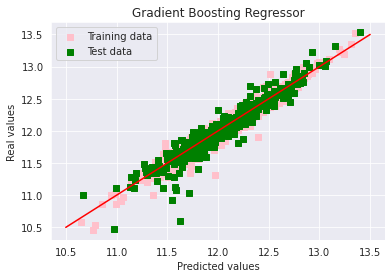

In [81]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Gradient Boosting Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Xgboost

In [82]:
learning_rate=[0.005,0.01,0.05,0.1,0.15,0.2]
n_estimators = [int(x) for x in np.linspace(start=200, stop=4000, num=6)]
max_depth = [int(x) for x in np.linspace(2, 20, num=10)]
min_samples_split = [2,3,4, 5, 10] 
min_samples_leaf = [1, 2, 3]
min_child_weight=[1,2,3,4]
gamma=[0, 1, 2]
subsample=[0.6,0.7,0.75,0.8,0.85,0.9]  
colsample_bytree=[0.5,0.7,1]

params={
    'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,
    'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,'min_child_weight':min_child_weight, 'gamma':gamma,
     'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB1=XGBRegressor(random_state=42)

rcvxgb= RandomizedSearchCV(XGB1, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)

rcvxgb.fit(X_train, y_train)
rcvxgb.best_estimator_

[16:00:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=2,
             min_child_weight=4, min_samples_leaf=1, min_samples_split=2,
             n_estimators=3240, random_state=42, subsample=0.8)

In [83]:
xgb=XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=2,
             min_child_weight=4, min_samples_leaf=1, min_samples_split=2,
             n_estimators=3240, random_state=42, subsample=0.8)
xgb.fit(X_train,y_train)
ytrain_pred=xgb.predict(X_train)
ytest_pred=xgb.predict(X_test)

[16:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Evaluation

### Train Scores

In [84]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.006263089337006929
MAE of train data:  0.05669768562205096
RMSE of train data:  0.0791396824419136
R2Score of train data:  0.9595939214180623


In [85]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9553521577574043


### Test Scores

In [86]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.016159994080706442
MAE of test data:  0.08311963998866226
RMSE of test data:  0.1271219653746214
R2Score of test data:  0.9047416965445402


In [87]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.877565062911659


In [88]:
# Append Model Performace Scores to List
hmrmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
hmadjr2_train.append(adjusted_r2train)
hmrmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
hmadjr2_test.append(adjusted_r2test)

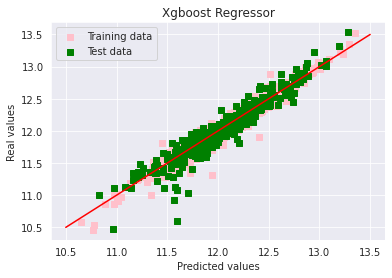

In [89]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Xgboost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# LightGBM

In [90]:
learning_rate=[0.005,0.01,0.05,0.1,0.15,0.2]  
n_estimators = [int(x) for x in np.linspace(start=200, stop=4000, num=6)] 
max_depth = [int(x) for x in np.linspace(2, 10, num=5)] 
num_leaves=[25,30,35]
min_child_weight=[1,2,3,4]
reg_alpha=[0, 1, 2]
subsample=[0.6,0.7,0.75,0.8,0.85,0.9]  
colsample_bytree=[0.5,0.7,1]  
                                         
                  
params={
    'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth,
    'num_leaves':num_leaves,'min_child_weight':min_child_weight,'reg_alpha':reg_alpha, 
     'subsample':subsample,'colsample_bytree':colsample_bytree
}

lgbm1=LGBMRegressor(random_state=42)
rcvlgbm= RandomizedSearchCV(lgbm1, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)

rcvlgbm.fit(X_train, y_train)
rcvlgbm.best_estimator_

LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_depth=2,
              min_child_weight=1, n_estimators=3240, num_leaves=30,
              random_state=42, reg_alpha=0, subsample=0.85)

In [91]:
lgbm=LGBMRegressor(colsample_bytree=1, learning_rate=0.01, max_depth=2,
              min_child_weight=1, n_estimators=3240, num_leaves=30,
              random_state=42, reg_alpha=0, subsample=0.85)

lgbm.fit(X_train,y_train)
ytrain_pred=lgbm.predict(X_train)
ytest_pred=lgbm.predict(X_test)

# Evaluation

### Train Scores

In [92]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.0074184045248693485
MAE of train data:  0.061067830458269565
RMSE of train data:  0.08613016036714055
R2Score of train data:  0.9521404501747504


In [93]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.947116233364091


### Test Scores

In [94]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.016520299713784114
MAE of test data:  0.08402028531759728
RMSE of test data:  0.1285313180271023
R2Score of test data:  0.9026178032336261


In [95]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8748352353326312


In [96]:
# Append Model Performace Scores to List
hmrmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
hmadjr2_train.append(adjusted_r2train)
hmrmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
hmadjr2_test.append(adjusted_r2test)

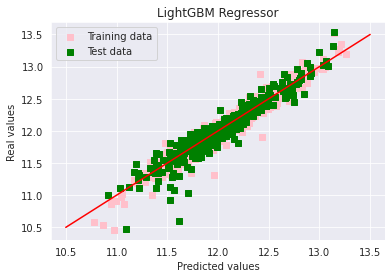

In [97]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("LightGBM Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Catboost

> Here what I will do is manually iterate some of the parameters. I keep 1 parameter constant and iterate with others and same process continues with rest of the parameters as well. One reason why I am doing this and not using GridSearchCV or RandomSearchCV is because it is taking a lot of time to train the model and sometimes may give worse results than the default parameters. Some of the features I have tuned are given below. This was done through many differnt trails and it gives slightly getter results than the model used with default parameter.

In [98]:
cat=CatBoostRegressor(iterations=7000,learning_rate=0.005,depth=7,l2_leaf_reg=1,
                      random_state=42,early_stopping_rounds=20)
cat.fit(X_train,y_train)
ytrain_pred=cat.predict(X_train)
ytest_pred=cat.predict(X_test)

Streaming output truncated to the last 5000 lines.
2000:	learn: 0.0705350	total: 16.3s	remaining: 40.8s
2001:	learn: 0.0705035	total: 16.4s	remaining: 40.8s
2002:	learn: 0.0704796	total: 16.4s	remaining: 40.8s
2003:	learn: 0.0704553	total: 16.4s	remaining: 40.8s
2004:	learn: 0.0704201	total: 16.4s	remaining: 40.8s
2005:	learn: 0.0703919	total: 16.4s	remaining: 40.8s
2006:	learn: 0.0703652	total: 16.4s	remaining: 40.8s
2007:	learn: 0.0703403	total: 16.4s	remaining: 40.8s
2008:	learn: 0.0703251	total: 16.4s	remaining: 40.8s
2009:	learn: 0.0702935	total: 16.4s	remaining: 40.8s
2010:	learn: 0.0702685	total: 16.4s	remaining: 40.8s
2011:	learn: 0.0702570	total: 16.4s	remaining: 40.8s
2012:	learn: 0.0702235	total: 16.5s	remaining: 40.8s
2013:	learn: 0.0701989	total: 16.5s	remaining: 40.8s
2014:	learn: 0.0701805	total: 16.5s	remaining: 40.8s
2015:	learn: 0.0701519	total: 16.5s	remaining: 40.7s
2016:	learn: 0.0701205	total: 16.5s	remaining: 40.7s
2017:	learn: 0.0700999	total: 16.5s	remaining: 4

# Evaluation

### Train Scores

In [99]:
print("MSE of train data: ", mean_squared_error(y_train, ytrain_pred))
print("MAE of train data: ", mean_absolute_error(y_train, ytrain_pred))
print("RMSE of train data: ", np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print("R2Score of train data: ", r2_score(y_train,ytrain_pred))

MSE of train data:  0.00035545923490678594
MAE of train data:  0.014819009358216022
RMSE of train data:  0.018853626571744386
R2Score of train data:  0.9977067684962669


In [100]:
## Checking adjusted r2 score
adjusted_r2train = 1-(1-(r2_score(y_train,ytrain_pred)))*(1022-1)/(1022-97-1) 
print("Adjusted R2Score of train data: ", adjusted_r2train)

Adjusted R2Score of train data:  0.9974660288254205


### Test Scores

In [101]:
print("MSE of test data: ", mean_squared_error(y_test, ytest_pred))
print("MAE of test data: ", mean_absolute_error(y_test, ytest_pred))
print("RMSE of test data: ", np.sqrt(mean_squared_error(y_test, ytest_pred)))
print("R2Score of test data: ", r2_score(y_test,ytest_pred))

MSE of test data:  0.01563584732442592
MAE of test data:  0.07937377313110533
RMSE of test data:  0.12504338176979188
R2Score of test data:  0.907831383985984


In [102]:
## Checking adjusted r2 score
adjusted_r2test = 1-(1-(r2_score(y_test,ytest_pred)))*(438-1)/(438-97-1) 
print("Adjusted R2Score of test data: ", adjusted_r2test)

Adjusted R2Score of test data:  0.8815362200055147


In [103]:
# Append Model Performace Scores to List
hmrmse_train.append(np.sqrt(mean_squared_error(y_train, ytrain_pred)))
hmadjr2_train.append(adjusted_r2train)
hmrmse_test.append(np.sqrt(mean_squared_error(y_test, ytest_pred)))
hmadjr2_test.append(adjusted_r2test)

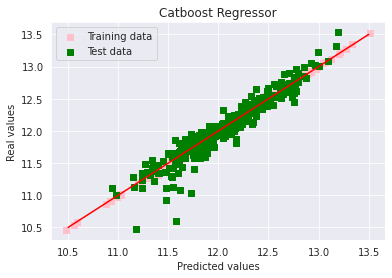

In [104]:
# Plot predictions
plt.scatter(ytrain_pred, y_train, c = "pink", marker = "s", label = "Training data")
plt.scatter(ytest_pred, y_test, c = "green", marker = "s", label = "Test data")
plt.title("Catboost Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Hypertuned Model Performance Table

In [105]:
hp = pd.DataFrame(tuned_models, columns = ['Regressors'])
hp['RMSE_TrainData'] = hmrmse_train
hp['adjr2score_TrainData'] = hmadjr2_train
hp['RMSE_TestData'] = hmrmse_test
hp['adjr2score_TestData'] = hmadjr2_test
hp

,Regressors,RMSE_TrainData,adjr2score_TrainData,RMSE_TestData,adjr2score_TestData
0,GBM,0.082886,0.951025,0.128734,0.874440
1,Xgboost,0.079140,0.955352,0.127122,0.877565
2,LightGBM,0.086130,0.947116,0.128531,0.874835
3,CatBoost,0.018854,0.997466,0.125043,0.881536


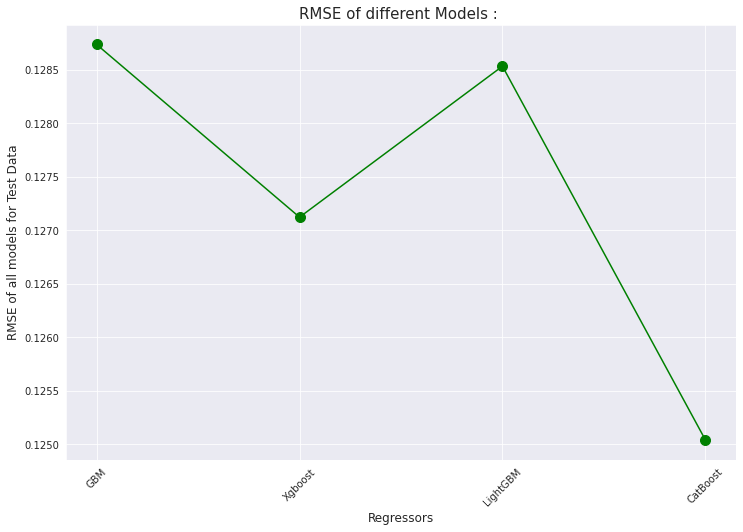

----------------------------------------------------------------------------------------------------


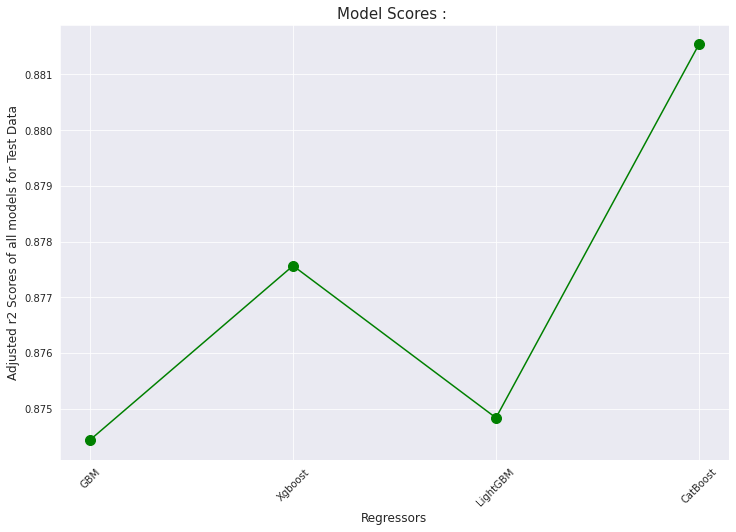

In [106]:
#Plot RMSE
plt.figure(figsize = (12,8))
plt.plot(hp['Regressors'],hp['RMSE_TestData'],"go-",markersize=10)
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('RMSE of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('RMSE of different Models : ',fontsize = 15)
plt.show()
print('-'*100)
#Plot AdjR2Score
plt.figure(figsize = (12,8))
plt.plot(hp['Regressors'],hp['adjr2score_TestData'],"go-",markersize=10)
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('Adjusted r2 Scores of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Model Scores : ',fontsize = 15)
plt.show()

> From this we can conclude that Hypertuned CatBoost Regressor is the best model for this dataset.

# Feature Importance 

In [107]:
feat_imp = cat.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,GrLivArea,14.207301
1,OverallQual,11.030518
2,TotalBsmtSF,5.533414
3,LotArea,4.546234
4,1stFlrSF,4.355945
...,...,...
92,HouseStyle_1.5Unf,0.006998
93,MiscVal,0.006736
94,SaleCondition_Alloca,0.005597
95,RoofMatl_WdShngl,0.004234


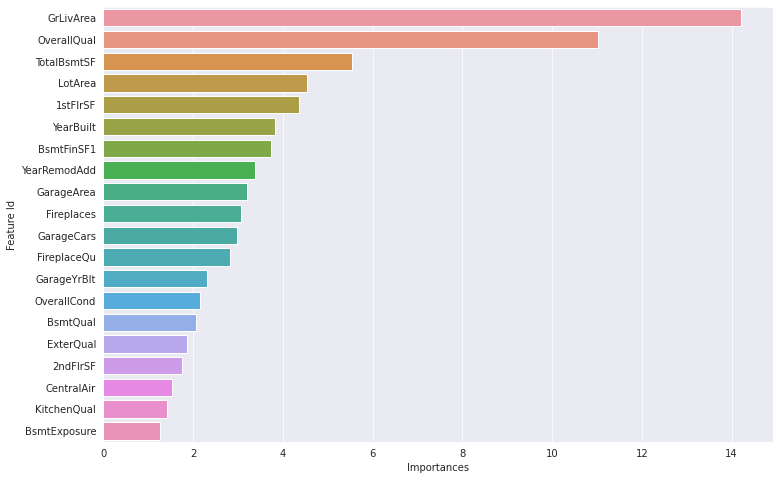

In [108]:
# Plotting top 20 features' importance
plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

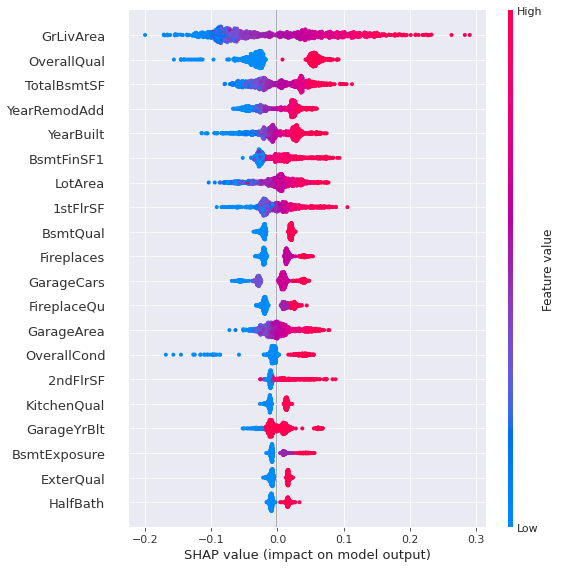

In [109]:
# Using Shap Values
train_pool = Pool(X_train)
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(train_pool)
shap.summary_plot(shap_values, X_train,show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

The above diagram represents each observation (x-axis) for the feature presented (y-axis). The x location of each dot on the x-axis reflects the impact of that feature on the model's predictions, while the color of the dot represents the value of that feature for that exact observation. Dots that pile up on the line show density. Here we can see how features such as 'HalfBath', differently from 'GrLivArea' and 'OverallQual', do not contribute significantly in producing the final predictions.

# Reversing back Target Variable to Original Value

In [110]:
data=pd.DataFrame(columns=['Actual SALE PRICE','Predicted SALE PRICE'])
data.iloc[:,0] = np.floor(np.exp(y_test)-1)
ytest_pred=cat.predict(X_test)
data.iloc[:,1] = np.floor(np.exp(ytest_pred)-1)
data.head(10)

,Actual SALE PRICE,Predicted SALE PRICE
0,154499.0,136551.0
1,324999.0,324607.0
2,114999.0,115211.0
3,159000.0,154020.0
4,315500.0,336543.0
5,75500.0,76216.0
6,311500.0,237401.0
7,145999.0,150549.0
8,84499.0,75955.0
9,135499.0,136817.0


# Conclusion

With this we have completed all the phases of the project and come to an end of this project. An in-depth EDA and extensive feature engineering has been presented here. Also a lot of iteration through different models and also hypertuning of those models. Our model has achieved a decent score and a low rmse indicating that our errors are minimal which bodes well for real time applications. Thank you.
***